In [27]:
import numpy as np
import sklearn.svm as svc
import matplotlib.pyplot as plt
import matplotlib as mpl

In [28]:
def lodardData(fileName):
    dataMat = [];labelMat =  []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]),float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

In [29]:
X,y = lodardData('data/svm1.txt')
clf = svc.SVC(kernel='linear',C=1)
clf.fit(X,y)

SVC(C=1, kernel='linear')

In [30]:
b = clf.intercept_
w = clf.coef_
b,w

(array([-3.83775658]), array([[ 0.81444269, -0.27274371]]))

In [35]:
print(clf.predict(np.array([[7.886242,0.1905]])))
print('支持向量数量',clf.n_support_)
print('支持向量索引',clf.support_)
print('支持向量',clf.support_vectors_)


[1.]
支持向量数量 [2 1]
支持向量索引 [17 29 55]
支持向量 [[ 4.658191  3.507396]
 [ 3.457096 -0.082216]
 [ 6.080573  0.418886]]


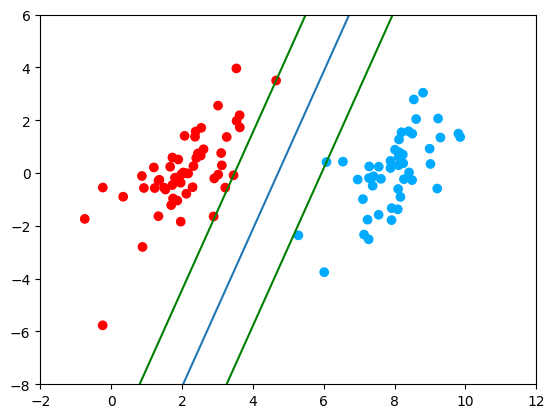

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
ax.scatter(np.array( X)[:,0], np.array(X)[:,1], c=np.array(y).squeeze(), marker='o', cmap=cm_dark)
x0 = np.arange(-2.0, 12.0, 0.1)
x1 = (-w[0][0]*x0 - b)/w[0][1]
ax.plot(x0,x1.reshape(-1,1))

#画间隔平面
pos0 = np.arange(-2.0, 12.0, 0.1)
pos1 = (1-w[0][0]*pos0 - b)/w[0][1]
ax.plot(pos0,pos1.reshape(-1,1),color="green")

neg0 = np.arange(-2.0, 12.0, 0.1)
neg1 = (-1-w[0][0]*neg0 - b)/w[0][1]
ax.plot(neg0,neg1.reshape(-1,1),color="green")

ax.axis([-2,12,-8,6])
plt.show()